In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [54]:
def load_data(file_path):
    data = []
    label = []
    with open(file_path, "r") as data_file:
        raw_data = data_file.readlines()
        for data_line in raw_data:
            sample = data_line[:-1]#去掉数据中的/n
            sample = sample.split(",")#以逗号分隔字符串
            label.append(sample[-1])#label记录最后bool值
            sample = np.array([float(feature) for feature in sample[:-1]])
            sample[-3] /= 10
            sample[-2] /= 100
            sample[-1] /= 1000
            #对最后三个较大的数处理
            data.append(sample)
            #将sample值导入到data中
    return np.array(data), np.array(label)
train_data,train_label = load_data("./train.data")
test_data,test_label = load_data("./test.data")
#调用函数，将训练和测试数据及分类放入四个数组中

In [55]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
layers.Dense(57, activation = 'softmax'),
layers.Dense(1, activation = 'sigmoid')])
#采用两层贯序模型
#第一层有57个节点（因为之前的数据处理，处理57D向量，因此是57路softmax层）
#第二层有1个节点，将文本分为两类

In [56]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
#对模型进行编译，设置优化器、损失函数、优化目标

In [57]:
history = model.fit(train_data, 
                    train_label,
                    epochs = 40, 
                    batch_size = 100,
                    validation_data=(test_data, test_label),
                    verbose=1)
#日志显示，1表示以进度条形式显示
#让模型适应训练集和测试集，进行40次迭代，随机梯度下降时一组数据量大小为20，每次更新权重

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 1s 237us/step - loss: 0.6851 - acc: 0.6126 - val_loss: 0.6738 - val_acc: 0.6885
Epoch 2/40
3224/3224 [==============================] - 0s 51us/step - loss: 0.6668 - acc: 0.6904 - val_loss: 0.6549 - val_acc: 0.7328
Epoch 3/40
3224/3224 [==============================] - 0s 45us/step - loss: 0.6486 - acc: 0.7469 - val_loss: 0.6353 - val_acc: 0.7967
Epoch 4/40
3224/3224 [==============================] - 0s 43us/step - loss: 0.6295 - acc: 0.8046 - val_loss: 0.6150 - val_acc: 0.8417
Epoch 5/40
3224/3224 [==============================] - 0s 46us/step - loss: 0.6097 - acc: 0.8344 - val_loss: 0.5938 - val_acc: 0.8642
Epoch 6/40
3224/3224 [==============================] - 0s 37us/step - loss: 0.5892 - acc: 0.8517 - val_loss: 0.5723 - val_acc: 0.8794
Epoch 7/40
3224/3224 [==============================] - 0s 38us/step - loss: 0.5687 - acc: 0.8703 - val_loss: 0.5508 - val_acc: 0.8867
Epoch 

In [58]:
history_dict = history.history
history_dict.keys()
dict_keys = ['loss', 'val_loss', 'val_acc', 'acc']

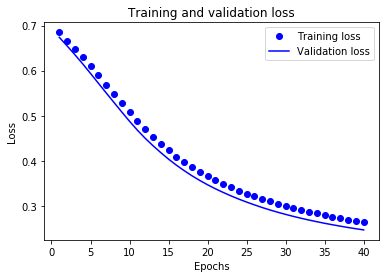

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#循环次数
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

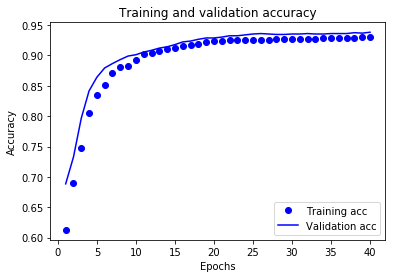

In [60]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [61]:
def load_data_forcase(file_path):
    data = []
    with open(file_path, "r") as data_file:
        raw_data = data_file.readlines()
        for data_line in raw_data:
            sample = data_line[:-1]#去掉数据中的/n
            sample = sample.split(",")#以逗号分隔字符串
            sample = np.array([float(feature) for feature in sample])
            sample[-3] /= 10
            sample[-2] /= 100
            sample[-1] /= 1000
            #对最后三个较大的数处理
            data.append(sample)
            #将sample值导入到data中
    return np.array(data)
forcase_data=load_data_forcase("./get_the_flag.data")

In [62]:
forcase_end = model.predict_classes(forcase_data , batch_size=20, verbose=1)
#使用训练出来的模型预测get_the_flag.data中的数据

560/560 [==============================] - 0s 262us/step


In [63]:
len(forcase_end)

560

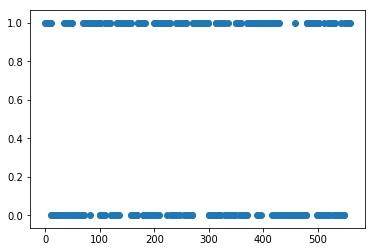

In [64]:
import matplotlib.pyplot as plt
x = np.array(range(560))
y = forcase_end
plt.scatter(x, y)
plt.show()
#将数据用散点图表示

In [75]:
flag = []
i = 0
t = 0
while i<560 :
    if forcase_end[i] == 1:
        t = t + 1
    if i % 10 == 0:
        if t>5 :
            flag.append(1)
        else:
            flag.append(0)
        t = 0
    i = i+1
print(flag[1:])

[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
